<table>
    <tr>
        <td><img src="./imagenes/Macc.png" width="400"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="color:blue;text-align:left">Inteligencia Artificial</h1></td>
        <td>
            <table><tr>
            <tp><p style="font-size:150%;text-align:center">Notebook</p></tp>
            <tp><p style="font-size:150%;text-align:center">Búsqueda en espacios de estados</p></tp>
            </tr></table>
        </td>
    </tr>
</table>

---

## Objetivo <a class="anchor" id="inicio"></a>

La representación de problemas es uno de los temas iniciales en la historia de la inteligencia artificial. Gracias a una mirada en perspectiva, hoy podemos definir una estructura común para la representación de muchos problemas en lo que se conoce como un **ambiente de tarea** o **espacio de estados**. El primer objetivo de este notebook es permitir al estudiante ganar familiaridad con la implementación particular en Python de espacios de estados.

El segundo objetivo de este notebook es la presentación de varias estrategias para la búsqueda en un espacio de estados. Existen varios métodos que **no** usa información sobre el problema (o búsqueda desinformada o a ciegas). Los métodos que veremos aquí son: la búsqueda *primero en anchura*, *primero en profundidad*, *backtracking* y *profundidad limitada*. También veremos el método general de *primero el mejor* aplicado al costo de las acciones, el cual se conoce mejor con el nombre de algoritmo de *Dikjstra*.

Adaptado de (Russell & Norvig, 2020), capítulo 3.

[Ir al ejercicio 1](#ej1)

## Dependencias

Al iniciar el notebook o reiniciar el kerner se pueden cargar todas las dependencias de este notebook corriendo las siguientes celdas. Este también es el lugar para instalar las dependencias que podrían hacer falta.

In [ ]:
#!pip install -r requirements.txt

**De Python:**

In [ ]:
from random import choice
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Del notebook:**

In [ ]:
from ambientes import OchoReinas, JarrasAgua, ViajeRumania
from utils import ListaPrioritaria, Nodo, nodo_hijo, compara_funciones

## Secciones

Desarrollaremos la explicación de la siguiente manera:

1. [Las ocho reinas](#presentacion).
2. [Implementación de espacios de estados](#implementacion).
3. [Estrategias ciegas](#ciegas).
4. [Las jarras de agua](#jarras).
5. [Nodos para la búsqueda](#nodos).
6. [Los métodos completos](#completos).
7. [Comparación de tiempos](#tiempos).
8. [Listas prioritarias](#listasp).
9. [Problema del viaje a Rumania](#rumania).
10. [Algoritmo de Dijkstra](#dijkstra).

## Las ocho reinas <a class="anchor" id="presentacion"></a>

([Volver al inicio](#inicio))

El siguiente problema se conoce como *Las ocho reinas*, el cual consiste en poner ocho reinas en un tablero de ajerdez de tal manera que ninguna pueda atacar a las demás. En el siguiente tablero hay siete reinas. ¿Es esta una situación admisible? ¿Cuál puede ser una solución al problema?

<img src="/content/imagenes/ocho_reinas.png" width="230">

<a class="anchor" id="ej1"></a>**Ejercicio 1:**

([Próximo ejercicio](#ej2))

De acuerdo con la formulación de entornos hecha durante la clase, ¿cuáles características considera usted que  tiene el *entorno* en este problema?

| Opción 1 | Opción 2 |
| :---: | :---: |
| $\checkmark$ Completamente observable | Parcialmente observable|
| $\checkmark$ Agente único | Multiagente |
| $\checkmark$ Determinista | Estocástico |
| $\checkmark$ Episódico    | $\checkmark$ Secuencial  |
| $\checkmark$ Estático     | Dinámico    |
| $\checkmark$ Discreto     | Continuo    |
| $\checkmark$ Conocido     | Desconocido |

----

¿Cómo definimos el *entorno*? Este puede representarse como una colección de estados, donde cada uno de ellos representa el tablero con cero o más reinas. Por su parte, las acciones del agente consisten en poner una reina en una casilla vacía del tablero (aunque no todas las acciones serán *aplicables* dado un estado del tablero).

La definición de un entorno, que aquí llamaremos **definición formal** del problema, se hace con base en la presentación de las siguientes características:

* **Estado inicial**: Situación del entorno desde la cual el agente comienza a resolver el problema. En nuestro ejemplo, el estado inicial es el tablero vacío.

* **Acciones aplicables**: Descripción de las posibles acciones del agente en el entorno, dado un estado `s`. Estas acciones se llaman las *acciones aplicables* en `s`. En nuestro problema, dado un estado con $k$ reinas ($k<8$), las acciones aplicables son poner una reina en una de las casillas vacías que no es atacada por ninguna de las otras reinas.

* **Función de transiciones**: Descripción del entorno que resulta de la ejecución de una de las acciones del agente. Junto con el estado inicial y las posibles acciones, la función de transiciones define el *espacio de estados* del problema. En nuestro ejemplo, la función toma un tablero con $k$ reinas ($k<8$) y devuelve un tablero con $k+1$ reinas.

* **Prueba de satisfacción del objetivo**: Es una prueba que permite determinar si un estado es un *estado objetivo* en el cual se resuelve el problema. Esta prueba puede contener una colección de estados objetivo (para chequear si el estado es uno de ellos) o puede estar dada en términos de una condición explícita que debe cumplir un estado. En nuestro ejemplo usaremos una condición explícita. Esto es, la prueba debe verificar la condición de si un tablero dado contiene ocho reinas en el cual niguna puede atacar a otra.

* **Función de costo**: Determina el costo numérico asociado a cada camino entre estados. En nuestro ejemplo, dicha función no es esencial, pero consideraremos que cada acción tiene el mismo costo, de tal manera que la función de costo es la cantidad de acciones realizadas (siempre devolverá el valor de 8 en cualquier solución).

## Implementación de espacios de estados <a class="anchor" id="implementacion"></a>

([Volver al inicio](#inicio))

Hemos implementado el problema de las ocho reinas mediante una clase en Python llamada `OchoReinas`, la cual se encuentra en el módulo `ambientes`. Dedique unos minutos a consultar el código.

En las siguientes celdas podemos ver la funcionalidad de la clase:

Este es el estado inicial:


<Axes: >

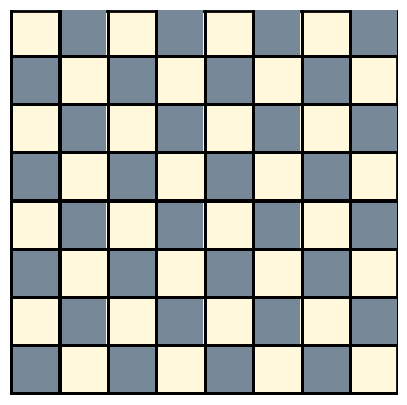

In [13]:
prob = OchoReinas()
s = prob.estado_inicial
print("Este es el estado inicial:")
prob.render(s)

Ponemos una dama en (0,0):

<Axes: >

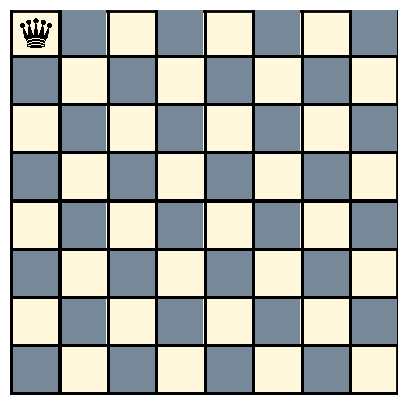

In [12]:
prob = OchoReinas()
s = prob.estado_inicial
s1 = prob.transicion(s,(0,0))
prob.render(s1)

Intentamos poner una dama en (7,7):

In [14]:
try:
    prob = OchoReinas()
    s = prob.estado_inicial
    s1 = prob.transicion(s,(0,0))
    s2 = prob.transicion(s1,(7,7))
except Exception as e:
    print(e)

¡La acción (7, 7) no puede resolverse sin conflicto! Las acciones posibles son [(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (2, 1), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (3, 1), (3, 2), (3, 4), (3, 5), (3, 6), (3, 7), (4, 1), (4, 2), (4, 3), (4, 5), (4, 6), (4, 7), (5, 1), (5, 2), (5, 3), (5, 4), (5, 6), (5, 7), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 7), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6)]


El espacio de estados bloquea la acción, ya que es ilegal poner una dama en (7,7) si hay una dama en (0,0).

<a class="anchor" id="ej2"></a>**Ejercicio 2:**

([Anterior ejercicio](#ej1)) ([Próximo ejercicio](#ej3))

Considere el siguiente estado:

<Axes: >

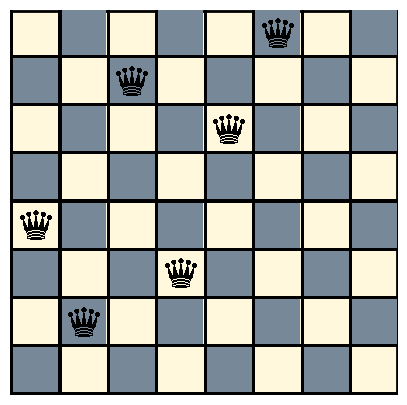

In [15]:
s1 = prob.transicion(s,(0,4))
s1 = prob.transicion(s1,(1,6))
s1 = prob.transicion(s1,(2,1))
s1 = prob.transicion(s1,(3,5))
s1 = prob.transicion(s1,(4,2))
s1 = prob.transicion(s1,(5,0))
prob.render(s1)

* ¿Cuáles son las acciones aplicables en `s1`?
* A partir de `s1` construya y dibuje un estado `s2` con 7 damas, usando una de las acciones aplicables de `s1`.
* A partir de `s2` construya y dibuje un estado `s3` con 8 damas, usando una de las acciones aplicables de `s2`.
* Determine si `s3` pasa la prueba de satisfacción del objetivo.

**Nota:** Use la función `choice` para seleccionar una de las acciones aplicables en cada estado.

---

---

## Estrategias ciegas (inicial) <a class="anchor" id="ciegas"></a>

([Volver al inicio](#inicio))

Las estrategias que consideraremos aquí son algunas de las llamadas *estrategias ciegas* o *estrategias desinformadas*, las cuales exploran el espacio de estados de manera sistemática. A este tipo de estrategias se le oponen las llamadas *estrategias informadas* o *heurísticas*, las cuales usan conocimiento específico del problema para buscar soluciones de manera más eficiente. En este notebook nos concentraremos en las estrategias ciegas. Las primeras que estudiaremos son: *primero en anchura* y *primero en profundidad*.

Observe que distintas estrategias tienen asociada una complejidad distinta, la cual también es importante examinar. Además, cada una de ellas tiene ventajas y desventajas sobre las cuales es importante ser consciente y aprender a evaluar empíricamente.

**Primero en anchura**

Lo que define a una estrategia de búsqueda de la forma *primero en anchura* es que, después de expandir el estado inicial, se expanden primero todos sus hijos antes de expandir cualquier nieto, y así sucesivamente. En otras palabras, se expande la raíz, luego el primer nivel, luego el segundo, etc.

<img src="/imagenes/breath-first search.jpeg" width="400"/>

Usaremos el problema de las ocho reinas para ilustrar el algoritmo. Comenzamos con el estado incial, que es el tablero vacío. Verificamos si este estado satisface la prueba. Claramente el tablero vacío no es un estado objetivo, entonces inicializamos una lista frontera. Para cada elemento de la frontera, vamos removiéndolo y chequeamos sus acciones aplicables. En el ejemplo, removemos el estado inicial y miramos sus acciones aplicables:

<img src="/imagenes/arbol.png" width="400"/>

En el dibujo faltan los otros 61 tableros con una sola reina. Para cada uno de estos tableros, a medida que los consideramos, chequeamos si satisfacen el objetivo. Si no, los incluimos en la frontera. En este caso incluimos todos en la frontera, pues todos tienen solo una reina y necesitamos poner ocho. Cuando acabamos de incluir todo el primer nivel, seguimos con el segundo. Para construir este nivel, retiramos de la frontera el primer tablero que encontremos y consideramos sus acciones aplicables. Por cada una de estas, chequeamos si el tablero con dos reinas obtenido satisface la prueba objetivo, y así continuamos el proceso hasta haber expandido ocho niveles para obtener un tablero con ocho reinas. Puesto que las acciones aplicables no nos permiten incluir una reina que ataque a otras, el primer tablero con ocho reinas que se encuentre en frontera será un estado objetivo y el proceso de búsqueda concluirá.

El siguiente es el pseudocódigo que implementa esta estrategia:

<div style="background-color:rgba(0, 0, 0, 0.0470588); padding:10px 0;font-family:monospace;">
<font style="font-weight: bold;" color = "red">function</font> primero_en_anchura(<font style="font-style: italic;">problema</font>) <font style="font-weight: bold;" color = "red">returns</font> solución o falla <br>
&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-style: italic;">estado</font> &#8592; <font style="font-style: italic;">problema</font>.estado_inicial <br>
&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">if</font> <font style="font-style: italic;">problema</font>.test_objetivo(<font style="font-style: italic;">estado</font>) <font style="font-weight: bold;" color = "red">then return</font> <font style="font-style: italic;">estado</font> <br>
&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-style: italic;">frontera</font> &#8592; lista FIFO con <font style="font-style: italic;">estado</font> como único elemento <br>
&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">While not</font> VACIA(<font style="font-style: italic;">frontera</font>) <font style="font-weight: bold;" color = "red">do</font> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-style: italic;">estado</font> &#8592; POP(<font style="font-style: italic;">frontera</font>) <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">for each</font> <font style="font-style: italic;">accion</font> <font style="font-weight: bold;" color = "red">in</font> <font style="font-style: italic;">problema</font>.acciones_aplicables(<font style="font-style: italic;">estado</font>) <font style="font-weight: bold;" color = "red">do</font> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-style: italic;">hijo</font> &#8592; <font style="font-style: italic;">problema</font>.transicion(<font style="font-style: italic;">estado</font>, <font style="font-style: italic;">accion</font>) <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">if</font> <font style="font-style: italic;">problema</font>.test_objetivo(<font style="font-style: italic;">hijo</font>) <font style="font-weight: bold;" color = "red">then return</font> <font style="font-style: italic;">hijo</font> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ADD(<font style="font-style: italic;">hijo</font>, <font style="font-style: italic;">frontera</font>)<br>
&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">return</font> falla <br>
</div>

<a class="anchor" id="ej3"></a>**Ejercicio 3:**

([Anterior ejercicio](#ej2)) ([Próximo ejercicio](#ej4))


Implemente la función `primero_en_anchura` y encuentre una solución para el tablero presentado más abajo.

In [ ]:
def primero_en_anchura(problema):
    pass
    # AQUÍ SU CÓDIGO

    # HASTA AQUÍ SU CÓDIGO

In [ ]:
prob = OchoReinas()
s = prob.estado_inicial
s = prob.transicion(s,(0,4))
s = prob.transicion(s,(1,6))
s = prob.transicion(s,(2,1))
prob.render(s)
prob.estado_inicial = s # Modificamos el estado inicial por defecto del problema

In [ ]:
%%time
print('Buscando solución en anchura...')
l = primero_en_anchura(prob)
if l is not None:
    print('La solución encontrada es:')
    prob.render(l)
else:
    print('No se encontró una solución!')

---

La presente estrategia de búsqueda garantiza que, si la solución existe, esta será encontrada en algún momento. Además, se encontrará la solución de menor altura en el árbol.

Las malas noticias es que su complejidad computacional es muy grande. Consideremos primero la siguiente notación:

* Sea $b$ la cantidad máxima de acciones posibles con respecto a cualquier estado. Observe que $b$ corresponde a la cantidad máxima de hijos que se incluirán en la frontera al expandir un estado.

* Sea $d$ la altura del primer estado solución del problema.

Observe que en la primera iteración se generan $b$ hijos a partir del estado inicial, luego $b$ nietos por cada uno de estos primeros $b$ hijos, y así, de tal manera que en la altura $d$ se generan $b^d$ estados. Bajo la convención de medir el tiempo de ejecución del algoritmo solo en términos de la cantidad de estados generados, se tiene que la complejidad de la estrategia `breadth_first_search` es $O(b + b^2 + b^3 + \ldots + b^d) = O(b^d)$.

Si medimos la cantidad de memoria requerida solo en términos de cuántos nodos debemos guardar en un instante dado, entonces debemos considerar que la `frontera` se expande con $b^n$ nodos en en el nivel $n$. Por lo tanto, la complejidad con respecto a la memoria para obtener una solución con altura $d$ es también $O(b^d)$.

La siguiente tabla ilustra muy bien el problema:

<img src="./imagenes/tabla_breadht_first.png" width="500px"/>

Observe que esta estimación determina que, para resolver el problema de las ocho reinas (altura 8) se requerirían 2 minutos y **103 gigabytes** de memoria (el estimado debe ser más alto, toda  vez que la tabla está pensada para un $b$ de 10, mientras que el problema de las ocho reinas tiene un $b$ promedio un poco mayor).

**Primero en profundidad**

En el algoritmo primero en profundidad la idea es expandir el estado con mayor profundidad. Cuando se llega a un estado sin acciones aplicables que no satisface la prueba de objetivo, entonces el algoritmo pasa al camino alternativo en el nivel inmediatamente anterior. Este procedimiento se ilustra en la siguiente figura:

<img src="./imagenes/depth-first-search.png" width="400"/>

La única diferencia en el pseudocódigo entre primero en profundidad y primero en anchura es que profundidad usa una lista LIFO y anchura una lista FIFO:

<div style="background-color:rgba(0, 0, 0, 0.0470588); padding:10px 0;font-family:monospace;">
<font style="font-weight: bold;" color = "red">function</font> primero_en_profundidad(<font style="font-style: italic;">problema</font>) <font style="font-weight: bold;" color = "red">returns</font> solución o falla <br>
&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-style: italic;">estado</font> &#8592; <font style="font-style: italic;">problema</font>.estado_inicial <br>
&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">if</font> <font style="font-style: italic;">problema</font>.test_objetivo(<font style="font-style: italic;">estado</font>) <font style="font-weight: bold;" color = "red">then return</font> <font style="font-style: italic;">estado</font> <br>
&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-style: italic;">frontera</font> &#8592; lista LIFO con <font style="font-style: italic;">estado</font> como único elemento <br>
&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">While not</font> VACIA(<font style="font-style: italic;">frontera</font>) <font style="font-weight: bold;" color = "red">do</font> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-style: italic;">estado</font> &#8592; POP(<font style="font-style: italic;">frontera</font>) <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">for each</font> <font style="font-style: italic;">accion</font> <font style="font-weight: bold;" color = "red">in</font> <font style="font-style: italic;">problema</font>.acciones_aplicables(<font style="font-style: italic;">estado</font>) <font style="font-weight: bold;" color = "red">do</font> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-style: italic;">hijo</font> &#8592; <font style="font-style: italic;">problema</font>.transicion(<font style="font-style: italic;">estado</font>, <font style="font-style: italic;">accion</font>) <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">if</font> <font style="font-style: italic;">problema</font>.test_objetivo(<font style="font-style: italic;">hijo</font>) <font style="font-weight: bold;" color = "red">then return</font> <font style="font-style: italic;">hijo</font> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ADD(<font style="font-style: italic;">hijo</font>, <font style="font-style: italic;">frontera</font>)<br>
&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">return</font> falla <br>
</div>

<a class="anchor" id="ej4"></a>**Ejercicio 4:**

([Anterior ejercicio](#ej3)) ([Próximo ejercicio](#ej5))


Implemente la función `primero_en_profundidad` y encuentre una solución para el tablero presentado más abajo.

In [ ]:
def primero_en_profundidad(problema):
    pass
    # AQUÍ SU CÓDIGO

    # HASTA AQUÍ SU CÓDIGO

In [ ]:
prob = OchoReinas()
s = prob.estado_inicial
s = prob.transicion(s,(0,4))
s = prob.transicion(s,(1,6))
s = prob.transicion(s,(2,1))
prob.render(s)
prob.estado_inicial = s # Modificamos el estado inicial por defecto del problema

In [ ]:
%%time
print('Buscando solución en profundidad...')
l = primero_en_profundidad(prob)
if l is not None:
    print('La solución encontrada es:')
    prob.render(l)
else:
    print('No se encontró una solución!')

---

## Las jarras de agua <a class="anchor" id="jarras"></a>

([Volver al inicio](#inicio))

Este es un problema de razonamiento sobre el uso de dos jarras de agua sin marcas, pero con capacidad conocida, para obtener una cantidad solicitada. Suponga que usted cuenta con dos jarras de agua, una de tres litros y otra de cuatro, y que también cuenta con acceso a una llave de agua para llenar las jarras. ¿Cómo puede obtener exáctamente dos litros de agua en la jarra de cuatro litros?

Este problema se puede formalizar de la siguiente manera. En primer lugar, representamos la situación de las jarras mediante una pareja ordenada $(x,y)$, donde el número de la izquierda corresponde a la cantidad de agua en la jarra de cuatro litros y el de la derecha a la cantidad de agua en la de tres.

* **Estado inicial**: Las dos jarras vacías, que representaremos como $(0,0)$.

* **Posibles acciones**: Tenemos las siguientes acciones:

1. Si $x<4$, llenar la jarra de cuatro litros.
2. Si $y<3$, llenar la jarra de tres litros.
3. Si $x>0$, vaciar la jarra de cuatro litros en el suelo.
4. Si $y>0$, vaciar la jarra de tres litros en el suelo.
5. Si $x>0$, verter el contenido de la jarra de cuatro litros en la jarra de tres litros hasta llenarla o que la primera quede vacía.
6. Si $y>0$, verter el contenido de la jarra de tres litros en la jarra de cuatro litros hasta llenarla o que la primera quede vacía.

* **Función de transiciones**: El resultado de cada acción se puede describir mediante la modificación de los estados:

1. $(x,y)\to (4,y)$
2. $(x,y)\to (x,3)$
3. $(x,y)\to (0,y)$
4. $(x,y)\to (x,0)$
5. $(x,y)\to (x-d,y+d)$ donde $d=\begin{cases}x,&\mbox{si }y+x\leq 3\\ 3-y,&\mbox{si }y+x>3\end{cases}$
6. $(x,y)\to (x+d,y-d)$ donde $d=\begin{cases}y,&\mbox{si }x+y\leq 4\\ 4-x,&\mbox{si }x+y>4\end{cases}$


* **Prueba de satisfacción del objetivo**: Nos sirve cualquier estado de la forma $(2,y)$.

* **Función de costo**: Vamos a asumir que cada acción tiene el mismo costo.

In [ ]:
prob = JarrasAgua()
s = prob.estado_inicial
prob.render(s)

**Problema de los ciclos**

En el problema de las jarras de agua aparecen muchas redundancias. Por ejemplo, podemos llenar la jarra de 4, luego verter su contenido en la jarra de 3 y, luego, verter el contenido de esta última en la primera, y así sucesivamente:

In [ ]:
prob = JarrasAgua()
s = prob.estado_inicial
acciones = [1, 5, 6, 5, 6]
for a in acciones:
    prob.pintar_transicion(s,a)
    s = prob.transicion(s,a)

La existencia de ciclos en las relaciones entre estados pone un problema importante para la búsqueda primero en profundidad. En efecto, el algoritmo puede quedarse atascado al seguir un camino cíclico, como el que acabamos de ilustrar.

Observe que al correr el procedimiento `primero_en_profundidad` sobre el problema de las jarras de agua nunca obtenemos una solución:

**Nota:** Tendrá que interrumpir el kernel. Esto se puede hacer oprimiendo el botón de detener, como se muestra en la siguiente figura:

<img src="./imagenes/interrumpir.png" width="400"/>

In [ ]:
prob = JarrasAgua()
s = prob.estado_inicial
l = None
print('Buscando una solución en profundidad...')
l = primero_en_profundidad(prob)
if l is not None:
    print('La solución encontrada es:')
    prob.pintar_estado(l)
else:
    print('No se encontró una solución!')

**Problema del camino a la solución**

Acabamos de ver que no podemos usar el método primero en profundidad. ¿Podemos usar el método primero en anchura? La respuesta es sí. Este método no se quedará atascado en ciclos. No obstante, al correrlo nos vamos a dar cuenta de otro problema:

In [ ]:
prob = JarrasAgua()
s = prob.estado_inicial
l = None
print('Buscando una solución en anchura...')
try:
    l = primero_en_anchura(prob)
except Exception as e:
    print(e)
if l is not None:
    print('La solución encontrada es:')
    prob.render(l)
else:
    print('No se encontró una solución!')

El resultado del ejercicio anterior nos debió mostrar un estado en el cual hay dos litros de agua en la jarra de 4 litros. Esto está muy bien. Pero, ¿cómo se logró esto? Es claro que la solución de nuestro problema no es un estado, sino el camino de acciones que se deben seguir para pasar del estado inicial al estado objetivo. Necesitamos, entonces, una estructura de datos para guardar dicho camino.

## Nodos para la búsqueda <a class="anchor" id="nodos"></a>

([Volver al inicio](#inicio))

Lo que vamos a hacer es construir un árbol a medida que realizamos nuestro procedimiento de búsqueda. Este árbol estará compuesto de nodos que representan estados, pero también tendrán atributos que nos permitirán saber quién es su antecesor, qué acción se usó para construirlo, y cuál es el costo acumulado para obtenerlo. También guardarán la codificación del estado que representan, pero sobre esto volveremos más adelante.

Una posible implementación que nos permite crear árboles de búsqueda es la de la clase `Nodo` del módulo `utils`.

Vamos a ilustrar la creación de un árbol de búsqueda mediante un ejemplo. Puede correr la siguiente celda varias veces, pues contiene un método de selección aleatorio para las dos acciones a ejecutar:

In [ ]:
# Ejemplo de creación de un nodo a partir de la raíz
raiz = Nodo(prob.estado_inicial, None, None, 0, prob.codigo(prob.estado_inicial))
camino = []
acciones = prob.acciones_aplicables(raiz.estado)
a = choice(acciones)
camino.append(a)
n1 = nodo_hijo(prob, raiz, a)
acciones = prob.acciones_aplicables(n1.estado)
a = choice(acciones)
camino.append(a)
n2 = nodo_hijo(prob, n1, a)
print("="*10, "Información de n1" + "="*10)
print("Codigo de madre de n1:", n1.madre.codigo)
print("Acción para crear n1:", n1.accion)
print("Codigo de n1:", n1.codigo)
print("")
print("="*10, "Información de n2" + "="*10)
print("Codigo de madre de n2:", n2.madre.codigo)
print("Acción para crear n2:", n2.accion)
print("Codigo de n2:", n2.codigo)


Aquí podemos ver las acciones que van desde la raíz (`n`) hasta `n2`. Esto nos permite ver que, cuando encontremos el nodo que representa un estado objetivo, tenemos toda la información requerida para encontrar el camino solución.

Finalmente, observe que el código de un estado nos permite visualizarlo fácilmente. Además, nos permitirá liberar memoria a la hora de generar la lista *explorados*, toda vez que solo almacenaremos códigos, no objetos completos. Adicionalmente, nos permite evitar problemas a la hora de chequear si un estado está en *explorados*, puesto que Python no funciona muy bien a la hora de revisar si un objeto está en una lista de objetos. Lo que haremos será revisar si el código de un estado está en una lista de códigos de los estados que ya hemos explorado.

<a class="anchor" id="ej5"></a>**Ejercicio 5:**

([Anterior ejercicio](#ej4)) ([Próximo ejercicio](#ej6))

Implemente la función `solucion`, la cual toma un nodo `n` y obtiene el camino de generación de `n` a partir del estado inicial. Confirme su código corriendo la función sobre `n2` y verificando las acciones que lo generaron.

In [ ]:
def solucion(n2):
    pass
    # AQUÍ SU CÓDIGO

    # HASTA AQUÍ SU CÓDIGO

In [ ]:
solucion(n2)

---

**Altura de un nodo en el árbol de búsqueda**

Consideremos ahora el problema de cómo encontrar la profundidad de un nodo. También conocida como su altura, la profundidad de un nodo es la cantidad de aristas desde la raíz hasta él. Por tanto, la raíz tiene profundidad 0, sus hijos tienen profundidad 1, los hijos de sus hijos tienen profundidad 2, etc.

Recuerde que un nodo es un objeto con atributos `estado`, `madre`, `accion`, `costo_camino`, `codigo`.

<a class="anchor" id="ej6"></a>**Ejercicio 6:**

([Anterior ejercicio](#ej5))  ([Próximo ejercicio](#ej7))

Implemente la función recursiva `depth` que recibe un nodo y retorna su altura. Pruebe su solución con el siguiente nodo `n3`, cuya profundidad debe ser, obviamente, 3:

In [ ]:
def depth(nodo):
    pass
    # AQUÍ SU CÓDIGO

    # HASTA AQUÍ SU CÓDIGO

In [ ]:
prob = JarrasAgua()
s = prob.estado_inicial
n = Nodo(s, None, None, 0, prob.codigo(s))
n1 = nodo_hijo(prob, n, 1)
n2 = nodo_hijo(prob, n1, 5)
n3 = nodo_hijo(prob, n2, 6)
print(f'La profundidad del nodo n3 es {depth(n3)}')

---

**Caminos cíclicos**

Otro aspecto importante que debemos considerar para los métodos de búsqueda son los caminos cíclicos. Esto es, debemos poder determinar si en la creación de un nodo se repiten estados, generando así un ciclo.

<a class="anchor" id="ej7"></a>**Ejercicio 7:**

([Anterior ejercicio](#ej6)) ([Próximo ejercicio](#ej8))

Implemente la función `is_cycle` que toma un nodo y devuelve un valor de verdad, dependiendo de si el camino de estados que va desde la raíz hasta él tiene estados repetidos (ciclos). Pruebe su función con el nodo `n3` definido anteriormente, para el cual `is_cycle` debe ser verdadero.

**Ayuda:** Pruebe definiendo primero una función recursiva que encuentra los códigos de todos los estados en el camino y luego verifica si hay repetidos.

In [ ]:
def camino_codigos(nodo):
    pass
    # AQUÍ SU CÓDIGO

    # HASTA AQUÍ SU CÓDIGO

def is_cycle(nodo):
    pass
    # AQUÍ SU CÓDIGO

    # HASTA AQUÍ SU CÓDIGO

In [ ]:
prob = JarrasAgua()
s = prob.estado_inicial
n = Nodo(s, None, None, 0, prob.codigo(s))
n1 = nodo_hijo(prob, n, 1)
n2 = nodo_hijo(prob, n1, 5)
n3 = nodo_hijo(prob, n2, 6)
print()
print(f'El camino del nodo n3 es {camino_codigos(n3)}')
print(f'El camino de n3 es cíclico? {is_cycle(n3)}')

La respuesta debe ser:

```
El camino del nodo n3 es ['0-0', '4-0', '1-3', '4-0']
El camino de n3 es cíclico? True
```

---

## Los métodos completos <a class="anchor" id="completos"></a>

([Volver al inicio](#inicio))

Ya podemos poner toda la carne en el asador. En efecto, podemos implementar las búsquedas primero en anchura y primero en profundidad evitando caminos repetidos, usando una estructura de árbol para guardar el camino de acciones que generan a cada nodo.

Los pseudocódigos de estos procedimientos son los siguientes:

**Primero en anchura**

<div style="background-color:rgba(0, 0, 0, 0.0470588); padding:10px 0;font-family:monospace;">
<font style="font-weight: bold;" color = "red">function</font> anchura(<font style="font-style: italic;">problema</font>) <font style="font-weight: bold;" color = "red">returns</font> solución o falla <br>
&nbsp;&nbsp; <font style="font-style: italic;">nodo</font> &#8592; NODO(<font style="font-style: italic;">problema</font>.estado_inicial) <br>
&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">if</font> <font style="font-style: italic;">problema</font>.test_objetivo(<font style="font-style: italic;">nodo</font>.estado) <font style="font-weight: bold;" color = "red">then return</font> <font style="font-style: italic;">nodo</font> <br>
&nbsp;&nbsp; <font style="font-style: italic;">frontera</font> &#8592; lista FIFO con <font style="font-style: italic;">nodo</font> como único elemento <br>
&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">While not</font> VACIA(<font style="font-style: italic;">frontera</font>) <font style="font-weight: bold;" color = "red">do</font> <br>
&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-style: italic;">nodo</font> &#8592; POP(<font style="font-style: italic;">frontera</font>) <br>
&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">for each</font> <font style="font-style: italic;">accion</font> <font style="font-weight: bold;" color = "red">in</font> <font style="font-style: italic;">problema</font>.acciones_aplicables(<font style="font-style: italic;">nodo</font>.estado) <font style="font-weight: bold;" color = "red">do</font> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-style: italic;">hijo</font> &#8592; nodo_hijo(<font style="font-style: italic;">problema</font>, <font style="font-style: italic;">nodo</font>, <font style="font-style: italic;">accion</font>) <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">if</font> <font style="font-style: italic;">problema</font>.test_objetivo(<font style="font-style: italic;">hijo</font>.estado) <font style="font-weight: bold;" color = "red">then return</font> <font style="font-style: italic;">hijo</font> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">if not</font> is_cycle(<font style="font-style: italic;">hijo</font>) <font style="font-weight: bold;" color = "red">then</font> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ADD(<font style="font-style: italic;">hijo</font>, <font style="font-style: italic;">frontera</font>)<br>
&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">return</font> falla <br>
</div>

**Primero en profundidad**


<div style="background-color:rgba(0, 0, 0, 0.0470588); padding:10px 0;font-family:monospace;">
<font style="font-weight: bold;" color = "red">function</font> anchura(<font style="font-style: italic;">problema</font>) <font style="font-weight: bold;" color = "red">returns</font> solución o falla <br>
&nbsp;&nbsp; <font style="font-style: italic;">nodo</font> &#8592; NODO(<font style="font-style: italic;">problema</font>.estado_inicial) <br>
&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">if</font> <font style="font-style: italic;">problema</font>.test_objetivo(<font style="font-style: italic;">nodo</font>.estado) <font style="font-weight: bold;" color = "red">then return</font> <font style="font-style: italic;">nodo</font> <br>
&nbsp;&nbsp; <font style="font-style: italic;">frontera</font> &#8592; lista LIFO con <font style="font-style: italic;">nodo</font> como único elemento <br>
&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">While not</font> VACIA(<font style="font-style: italic;">frontera</font>) <font style="font-weight: bold;" color = "red">do</font> <br>
&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-style: italic;">nodo</font> &#8592; POP(<font style="font-style: italic;">frontera</font>) <br>
&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">for each</font> <font style="font-style: italic;">accion</font> <font style="font-weight: bold;" color = "red">in</font> <font style="font-style: italic;">problema</font>.acciones_aplicables(<font style="font-style: italic;">nodo</font>.estado) <font style="font-weight: bold;" color = "red">do</font> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-style: italic;">hijo</font> &#8592; nodo_hijo(<font style="font-style: italic;">problema</font>, <font style="font-style: italic;">nodo</font>, <font style="font-style: italic;">accion</font>) <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">if</font> <font style="font-style: italic;">problema</font>.test_objetivo(<font style="font-style: italic;">hijo</font>.estado) <font style="font-weight: bold;" color = "red">then return</font> <font style="font-style: italic;">hijo</font> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">if not</font> is_cycle(<font style="font-style: italic;">hijo</font>) <font style="font-weight: bold;" color = "red">then</font> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ADD(<font style="font-style: italic;">hijo</font>, <font style="font-style: italic;">frontera</font>)<br>
&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">return</font> falla <br>
</div>

<a class="anchor" id="ej8"></a>**Ejercicio 8:**

([Anterior ejercicio](#ej7)) ([Próximo ejercicio](#ej9))

Implemente los métodos `anchura` y `profundidad` de acuerdo a los anteriores pseudocódigos.

In [ ]:
def anchura(problema):
    pass
    # AQUÍ SU CÓDIGO

    # HASTA AQUÍ SU CÓDIGO

In [ ]:
%%time
print('Buscando solución con primero en anchura...')
prob = JarrasAgua()
l = anchura(prob)
if l is not None:
    camino = solucion(l)
    print("La solución encontrada es: ", camino)
else:
    print('No se encontró una solución!')

La respuesta debe ser:
    
```
Buscando solución con primero en anchura...
La solución encontrada es:  [1, 5, 4, 5, 1, 5]
```

In [ ]:
def profundidad(problema):
    pass
    # AQUÍ SU CÓDIGO

    # HASTA AQUÍ SU CÓDIGO

In [ ]:
%%time
print('Buscando solución con primero en profundidad...')
prob = JarrasAgua()
l = profundidad(prob)
if l is not None:
    camino = solucion(l)
    print("La solución encontrada es: ", camino)
else:
    print('No se encontró una solución!')

La respuesta debe ser:
    
```
Buscando solución con primero en profundidad...
La solución encontrada es:  [2, 6, 2, 6, 4, 5, 4, 5, 1, 5]
```

---

**Backtracking**

La idea de la estrategia de backtracking es ir expandiendo recursivamente el nodo hijo. Cuando se llega a un estado sin acciones aplicables que no satisface la prueba de objetivo, entonces el algoritmo pasa al camino alternativo en el mismo nivel. Esta estrategia utiliza menos memoria que las dos estrategias anteriores, dado que no usa una lista `frontera`. Además, puede encontrar la solución más rápidamente sin tener que explorar gran parte del espacio de estados. Esto sucede, no obstante, solo si los estados iniciales seleccionados conducen al estado objetivo. En el peor de los casos, el backtracking deberá explorar todo el espacio de estados.

Un pseudocódigo para el procedimiento recursivo de backtracking es el siguiente:

<div style="background-color:rgba(0, 0, 0, 0.0470588); padding:10px 0;font-family:monospace;">
<font style="font-weight: bold;" color = "red">function</font> backtracking(<font style="font-style: italic;">problema</font>, <font style="font-style: italic;">nodo</font>) <font style="font-weight: bold;" color = "red">returns</font> solución o falla <br>
&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">if</font> <font style="font-style: italic;">problema</font>.test_objetivo(<font style="font-style: italic;">nodo</font>.estado) <font style="font-weight: bold;" color = "red">then return</font> <font style="font-style: italic;">nodo</font> <br>
&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">for each</font> <font style="font-style: italic;">accion</font> <font style="font-weight: bold;" color = "red">in</font> <font style="font-style: italic;">problema</font>.acciones_aplicables(<font style="font-style: italic;">estado</font>) <font style="font-weight: bold;" color = "red">do</font> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-style: italic;">hijo</font> &#8592; nodo_hijo(<font style="font-style: italic;">problema</font>, <font style="font-style: italic;">nodo</font>, <font style="font-style: italic;">accion</font>) <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">if not</font> is_cycle(<font style="font-style: italic;">hijo</font>) <font style="font-weight: bold;" color = "red">then</font> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-style: italic;">resultado</font> &#8592; backtracking(<font style="font-style: italic;">problema</font>, <font style="font-style: italic;">hijo</font>) <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">if</font> <font style="font-style: italic;">resultado</font> <font style="font-weight: bold;" color = "red">no es</font> falla <font style="font-weight: bold;" color = "red">then return</font> <font style="font-style: italic;">resultado</font> <br>
&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">return</font> falla <br>
</div>

<a class="anchor" id="ej9"></a>**Ejercicio 9:**

([Anterior ejercicio](#ej8)) ([Próximo ejercicio](#ej10))


Implemente la función `backtracking` y encuentre una solución para el problema presentado más abajo.

In [ ]:
def backtracking(problema, nodo, camino):
    pass
    # AQUÍ SU CÓDIGO

    # HASTA AQUÍ SU CÓDIGO

In [ ]:
%%time
print('Buscando solución con backtracking...')
prob = JarrasAgua()
nodo = Nodo(prob.estado_inicial, None, None, 0, prob.codigo(prob.estado_inicial))
l = backtracking(prob, nodo)
if l is not None:
    camino = solucion(l)
    print("La solución encontrada es: ", camino)
else:
    print('No se encontró una solución!')

La respuesta debe ser:
    
```
Buscando solución con backtracking...
La solución encontrada es:  [1, 2, 3, 6, 2, 6, 3, 6]
```

---

<a class="anchor" id="ej10"></a>**Ejercicio 10:**

([Anterior ejercicio](#ej9))  ([Próximo ejercicio](#ej11))

Vamos a comparar las soluciones al problema de las jarras de agua encontradas por los métodos: `anchura`, `profundidad` y `backtracking`. Complete la siguiente tabla donde las columnas son los métodos y las filas son las variables: (a) número de pasos de la solución y (b) tiempo en CPU para encontrar la solución. Presente en tipo de fuente negrita el valor óptimo para cada columna.

| Variable | Anchura | Profundidad | Backtracking |
| :---: | :---: | :---: | :---: |
| #Pasos | ? | ? | ? |
| Tiempo CPU (ms) | ?  | ? | ? |

---

## Comparación empírica de tiempos <a class="anchor" id="tiempos"></a>

([Volver al inicio](#inicio))

La eficiencia de los algoritmos es un tema central en las ciencias de la computación. Ella se estudia usalmente de manera teórica, respecto al tiempo y memoria que consume un algoritmo al correr en un modelo de computación respecto a varios tipos de entradas. En este curso usaremos un enfoque alternativo, aunque también bastante común, a saber, usaremos el tiempo en CPU para evaluar la eficiencia de los algoritmos. Este enfoque no reemplaza al teórico y es sólo una aproximación al mismo.

Debemos tener presente que el computador es una pieza de hardware cuyos tiempos de funcionamiento dependen de muchas cosas (nivel de energía, estado del hardware, etc.). Además, un computador realiza muchas tareas al mismo tiempo. En consecuencia, medir los tiempos del computador para evaluar una función requiere tratar de cancelar todo este ruido alrededor. Una manera de hacerlo es obtener varias mediciones del mismo proceso.

Vamos a hacer un ejemplo con el problema de las ocho reinas. Inicializamos un tablero ya con tres reinas (de lo contrario, los algoritmos tomarán mucho tiempo en terminar).

In [ ]:
prob = OchoReinas()
s = prob.estado_inicial
s = prob.transicion(s,(0,4))
s = prob.transicion(s,(1,6))
s = prob.transicion(s,(2,1))
prob.estado_inicial = s # Modificamos el estado inicial por defecto del problema

Ahora encontramos los tiempos en CPU usando la función `compara_funciones` que se encuentra en el módulo `utils`.

In [ ]:
funs = [anchura,
        profundidad,
        lambda problema: backtracking(problema, Nodo(problema.estado_inicial, None, None, 0, problema.codigo(problema.estado_inicial)))]
args = [[prob],[prob],[prob]]
nombres = ['Primero en anchura',
           'Primero en profundidad',
           'Backtracking']
data = compara_funciones(lista_funs=funs,
                         lista_args=args,
                         lista_nombres=nombres,
                         num_it=10)

Los resultados los hemos guardado en el dataframe `data`. Podemos correr unas estadísticas descriptivas:

In [ ]:
data.groupby('Función').agg({'tiempo_CPU':['mean', 'std']})

Observe que el más lento es primero en anchura y el más rápido el backtracking. Esta información se puede presentar visualmente mediante unos diagramas de caja y bigotes:

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(3*len(funs),3), tight_layout=True)
sns.boxplot(data=data, x='Función', y='tiempo_CPU')
fig.savefig('reinas.png', dpi=300)

Como los algoritmos primero en profundidad y backtracking tienen desempeños muy similares, en comparación con el de primero en anchura, vale la pena hacer una visualización solo de los dos primeros:

In [ ]:
ganadores = ['Primero en profundidad', 'Backtracking']
data_2 = data[data.Función.isin(ganadores)]
fig, ax = plt.subplots(1,1, figsize=(6,3), tight_layout=True)
sns.boxplot(data=data_2, x='Función', y='tiempo_CPU')
fig.savefig('reinas1.png', dpi=300)

## Listas prioritarias <a class="anchor" id="listasp"></a>

([Volver al inicio](#inicio))

En una lista prioritaria los elementos tienen una prioridad de acuerdo al valor que reciben por una función de evaluación $f$. Para este tipo de listas, la acción POP remueve y retorna el elemento prioritario, que es aquel con valor mínimo de $f$. Cuando dos elementos tienen la misma prioridad, el primer elemento en ser incluido es el primero en salir.

Existen librerías que proporcionan objetos que implementan listas prioritarias, como <a href="https://pypi.org/project/HeapDict/">heapdict</a>. Aquí utilizaremos la clase `ListaPrioritaria` del módulo `utils` para implementar las listas prioritarias. La idea es mantener una lista de parejas (elemento, valor), que se ordena por el valor, es decir, el segundo elemento de la pareja. De esta manera, al llamar el método `pop`, se devuelve el primer argumento de la pareja de menor valor.

Vamos a incluir algunos elementos en nuestra lista. Observe que incluimos las prioridades manualmente, sin recurrir a una función $f$:

In [ ]:
lista = ListaPrioritaria()
lista.push('g', 2)
lista.push('e', 3)
lista.push('k', 1)
lista.push('s', 2)
print("La lista prioritaria:", lista)

El método `pop` devuelve el elemento prioritario:

In [ ]:
n = lista.pop()
n

Observe que tanto 'g' como 's' tienen la misma prioridad. No obstante, 'g' fue el primero en ser incluido en `lista` y, por lo tanto, es el primero en salir:

In [ ]:
print("La lista prioritaria:", lista)
print("Al hacer pop con dos elementos con el mismo valor se obtiene:", lista.pop())

Para determinar si la lista prioritaria está vacía, usamos el método `is_empty`.

In [ ]:
print("La lista prioritaria:", lista)
print("Longitud:", len(lista))
print("Lista vacía?", lista.is_empty())

## El problema del viaje a Rumania <a class="anchor" id="rumania"></a>

([Volver al inicio](#inicio))

Imagine que usted viaja a Rumania y que desconoce por completo el país, pero tiene a mano un mapa de los caminos, que le indica las longitudes en kilómetros, como el siguiente:

<img src="./imagenes/Rumania.png" width="auto"/>

El problema consiste en, dada una ciudad de salida y una ciudad de llegada, encontrar el camino más corto.

Supongamos que nuestro problema es ir desde Arad hasta Bucharest. Entonces creamos el problema así:

In [ ]:
viaje = ViajeRumania('Arad', 'Bucharest')

Observe que el problema tiene los atributos de rutas, coordenadas y distancias, que podemos visualizar así:

In [ ]:
viaje.rutas

In [ ]:
viaje.coordenadas

In [ ]:
viaje.distancias

## Algoritmo de Dijkstra <a class="anchor" id="dijkstra"></a>

([Volver al inicio](#inicio))

Al realizar una búsqueda en un espacio de estados usando una función de costo, creamos una frontera mediante una lista prioritaria. En esta lista, el valor de cada nodo es su costo camino. Observe que estos costos siempre crecerán a medida que aumentamos la longitud del camino. En este algoritmo primero expandimos el nodo de menor costo.

El siguiente es el pseudocódigo del algoritmo:

<div style="background-color:rgba(0, 0, 0, 0.0470588); padding:10px 0;font-family:monospace;">
<font style="font-weight: bold;" color = "red">function</font> dijkstra(<font style="font-style: italic;">problema</font>) <font style="font-weight: bold;" color = "red">returns</font> <font style="font-style: italic;">nodo</font> o falla <br>
&nbsp;&nbsp; <font style="font-style: italic;">s</font> &#8592; <font style="font-style: italic;">problema</font>.estado_inicial <br>
&nbsp;&nbsp; <font style="font-style: italic;">cod</font> &#8592; <font style="font-style: italic;">problema</font>.codigo(<font style="font-style: italic;">s</font>) <br>
&nbsp;&nbsp; <font style="font-style: italic;">nodo</font> &#8592; NODO(<font style="font-style: italic;">s</font>) <br>
&nbsp;&nbsp; <font style="font-style: italic;">frontera</font> &#8592; lista prioritaria con 1 item con key <font style="font-style: italic;">nodo</font> y valor 0<br>
&nbsp;&nbsp; <font style="font-style: italic;">explorados</font> &#8592; diccionario con 1 item con key <font style="font-style: italic;">cod</font> y valor 0 <br>
&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">While not</font> VACIA(<font style="font-style: italic;">frontera</font>) <font style="font-weight: bold;" color = "red">do</font> <br>
&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-style: italic;">nodo</font> &#8592; POP(<font style="font-style: italic;">frontera</font>) <br>
&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">if</font> <font style="font-style: italic;">problema</font>.test_objetivo(<font style="font-style: italic;">nodo</font>.estado) <font style="font-weight: bold;" color = "red">then return</font> <font style="font-style: italic;">nodo</font> <br>
&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">for each</font> <font style="font-style: italic;">accion</font> <font style="font-weight: bold;" color = "red">in</font> <font style="font-style: italic;">problema</font>.acciones_aplicables(<font style="font-style: italic;">estado</font>) <font style="font-weight: bold;" color = "red">do</font> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-style: italic;">hijo</font> &#8592; nodo_hijo(<font style="font-style: italic;">problema</font>, <font style="font-style: italic;">nodo</font>, <font style="font-style: italic;">accion</font>) <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-style: italic;">s</font> &#8592; <font style="font-style: italic;">hijo</font>.estado<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-style: italic;">cod</font> &#8592; <font style="font-style: italic;">hijo</font>.codigo <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-style: italic;">c</font> &#8592; <font style="font-style: italic;">hijo</font>.costo_camino <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">if</font> <font style="font-style: italic;">cod</font> <font style="font-weight: bold;" color = "red">not in</font> <font style="font-style: italic;">explorados</font>.keys <font style="font-weight: bold;" color = "red">or</font> <font style="font-style: italic;">c</font> &#60; <font style="font-style: italic;">explorados</font>[<font style="font-style: italic;">cod</font>] <font style="font-weight: bold;" color = "red">then</font> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ADD((<font style="font-style: italic;">hijo</font>, <font style="font-style: italic;">c</font>), <font style="font-style: italic;">frontera</font>) <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-style: italic;">explorados</font>[<font style="font-style: italic;">cod</font>] &#8592; <font style="font-style: italic;">c</font> <br>
    &nbsp;&nbsp; <font style="font-weight: bold;" color = "red">return</font> falla <br>
</div>

El algoritmo toma el estado inicial del problema, le calcula su código y, luego, crea el nodo raíz. A continuación, inicia la lista `frontera` como una lista prioritaria. También inicializa el diccionario `explorados`, mediante el cual se van a relacionar los nodos con su `costo_camino`. Este diccionario permitirá tanto llevar la cuenta de cuáles estados hemos visitado, como de asociar el costo en que se incurre para llegar hasta un estado particular partiendo desde el estado inicial.

<a class="anchor" id="ej11"></a>**Ejercicio 11:**

([Anterior ejercicio](#ej10))

Implemente el algoritmo de Dijkstra de acuerdo al anterior pseudocódigo. Verifique que la solución al problema del viaje a Rumania sea:

```
La solución mediante el algoritmo de Dijkstra es:
['Arad', 'Sibiu', 'Rimnicu Vilcea', 'Pitesti', 'Bucharest']
El costo de la solución es: 508
```

---

## En este notebook usted aprendió

([Volver al inicio](#inicio))

* Cómo definir formalmente un problema e implementar el ambiente de tarea en python.
* Cómo realizar una búsqueda mediante los métodos *primero en anchura*, *backtracking*, *primero en profundidad* y *Dijkstra* e implementarlos en python.